# Simple Linear Regression Ordinary Least Squares Methodologies with Python

In [936]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Matrix Math for correlation

In [945]:
XA=np.array([16.1,18.2,19.3,20.4])
XB=np.array([36.7,37.1,37.7,42.1])

In [952]:
np.var(XA,ddof=1)

3.3666666666666636

In [946]:
np.cov(XA,XB)

array([[3.36666667, 3.64666667],
       [3.64666667, 6.25333333]])

In [947]:
np.corrcoef(XA,XB)

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

correlation = cov/(std of XA * sd of XB)

In [948]:
3.647/(np.sqrt(3.3667)*np.sqrt(6.2533))

0.794838548630076

In [949]:
# centering 
XAmc=XA-np.mean(XA)
XAmc

array([-2.4, -0.3,  0.8,  1.9])

* Centering takes away the intercept term and simplifies math manipulation
* Does not change the covaraince matrix
* Sum of variable is 0

In [953]:
X1=np.array([-2.4,-0.3,0.8,1.9])
X2=np.array([-1.7,-1.3,-0.7,3.7])

In [954]:
np.var(X1,ddof=1)

3.3666666666666667

In [955]:
np.var(X2,ddof=1)

6.253333333333334

In [956]:
np.cov(X1,X2)

array([[3.36666667, 3.64666667],
       [3.64666667, 6.25333333]])

In [957]:
np.corrcoef(X1,X2)

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

In [958]:
sum(X1)

2.220446049250313e-16

In [968]:
X2.shape

(4,)

In [969]:
X2

array([-1.7, -1.3, -0.7,  3.7])

In [970]:
X_matrix=pd.DataFrame(X1,columns=["X1"])
X_matrix["X2"]=X2.tolist()
X_matrix

,X1,X2
0,-2.4,-1.7
1,-0.3,-1.3
2,0.8,-0.7
3,1.9,3.7


In [971]:
X_matrix.shape

(4, 2)

In [972]:
Xt=np.transpose(X_matrix)
Xt

,0,1,2,3
X1,-2.4,-0.3,0.8,1.9
X2,-1.7,-1.3,-0.7,3.7


In [973]:
Xt.shape

(2, 4)

In [974]:
XtX=((Xt.dot(X_matrix)))
XtX

,X1,X2
X1,10.10,10.94
X2,10.94,18.76


sum of the squared deviation from the mean for X1 = 10.10 = SSX1

sum of squared deviation from the mean for X2 = 18.76 = SSX2

sum of the cross products = 10.94 = SX1X2


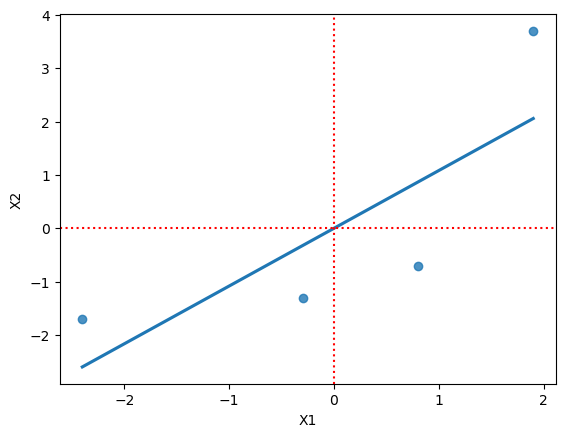

In [867]:
import seaborn as sns
plotX=sns.regplot(x='X1',y='X2',data=X_matrix,ci=None)
plotX.axvline(x=np.mean(X1),c="r",linestyle=":")
plotX.axhline(y=np.mean(X2),c="r",linestyle=":")

# Moving from correlation to OLS Regression and the best fitting line

We will work it out long form. 

In [975]:
XB=np.array([16.1,18.2,19.3,20.4])
YB=np.array([36.7,37.1,37.7,42.1])

In [976]:
# sum of squared deviations = SSX
np.sum(np.square(XB-np.mean(XB)))

10.09999999999999

In [977]:
# sum of squared deviations = SSY
np.sum(np.square(YB-np.mean(YB)))

18.759999999999994

In [978]:
# sum of cross products = SXBYB
np.sum((XB-np.mean(XB)) * (YB-np.mean(YB)))

10.93999999999999

In [979]:
np.cov(XB,YB)

array([[3.36666667, 3.64666667],
       [3.64666667, 6.25333333]])

In [980]:
np.cov(XB-np.mean(XB),YB-np.mean(YB))

array([[3.36666667, 3.64666667],
       [3.64666667, 6.25333333]])

sum of cross-products / (n-1) = 10.94 / 3 = 3.65 = covariance on off diagonal

sum of squared deviations X  / (n-1) = 10.10 / 3 =  3.37 = variance of X

In [880]:
np.corrcoef(XB,YB)

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

In [881]:
np.corrcoef((XB-np.mean(XB)),(YB-np.mean(YB)))

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

In [882]:
# r = cov / sXsY = 3.65 / (2.50*1.84) = 3.65/4.6 = 0.794
3.647 / (2.50*1.84)

0.7928260869565216

In [883]:
np.sqrt(np.var(YB,ddof=1))

2.500666577801473

In [884]:
np.sqrt(np.var((YB-np.mean(YB)),ddof=1))

2.500666577801473

In [885]:
np.sqrt(np.var(XB,ddof=1))

1.834847859269717

* slope of regression line = Sum of cross products / sum of squared deviations from X = beta coefficient for X = 1.08

* slope of regression line = covX,Y / varX

In [981]:
10.94/10.10

1.0831683168316832

In [982]:
3.647/3.367

1.0831600831600832

* find the y-intercept

y-intercept = b0 = ymean - b1*xmean = 38.4 - (1.08 * 18.5) = 18.36

In [888]:
np.mean(YB)

38.400000000000006

In [889]:
np.mean(XB)

18.5

In [983]:
np.mean(YB) - 1.0832 * np.mean(XB)

18.36080000000001

# Using matrices to find the regression model

Making a dataframe to be able to use it in a statsmodel OLS model

In [984]:
X_df=pd.DataFrame(XB,columns=["XB"])
X_df["YB"]=YB.tolist()
X_df

,XB,YB
0,16.1,36.7
1,18.2,37.1
2,19.3,37.7
3,20.4,42.1


In [985]:
from statsmodels.formula.api import ols

model = ols("YB ~ XB", data=X_df)
results = model.fit()
print(results.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.447  
Dependent Variable: YB               AIC:                17.5383
Date:               2024-07-28 16:40 BIC:                16.3109
No. Observations:   4                Log-Likelihood:     -6.7691
Df Model:           1                F-statistic:        3.430  
Df Residuals:       2                Prob (F-statistic): 0.205  
R-squared:          0.632            Scale:              3.4551 
-----------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
-----------------------------------------------------------------
Intercept    18.3614   10.8601  1.6907  0.2330  -28.3660  65.0888
XB            1.0832    0.5849  1.8519  0.2052   -1.4334   3.5997
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          2.049
Prob(Omnibus):         nan         Ja

C:\Users\carol\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


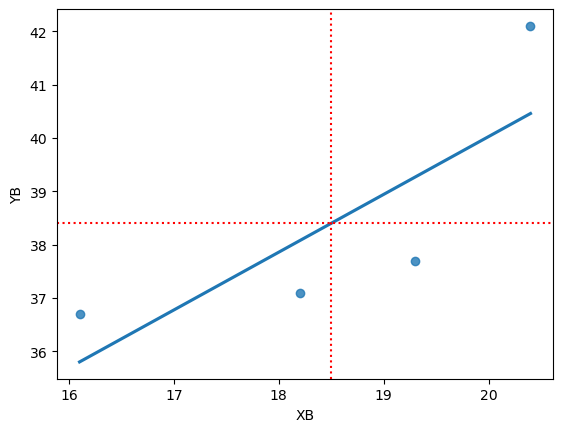

In [893]:
import seaborn as sns
plotX=sns.regplot(x='XB',y='YB',data=X_df,ci=None)
plotX.axvline(x=np.mean(XB),c="r",linestyle=":")
plotX.axhline(y=np.mean(YB),c="r",linestyle=":")

In [986]:
# y-intercept
np.mean(YB) - 1.0832 * np.mean(XB)

18.36080000000001

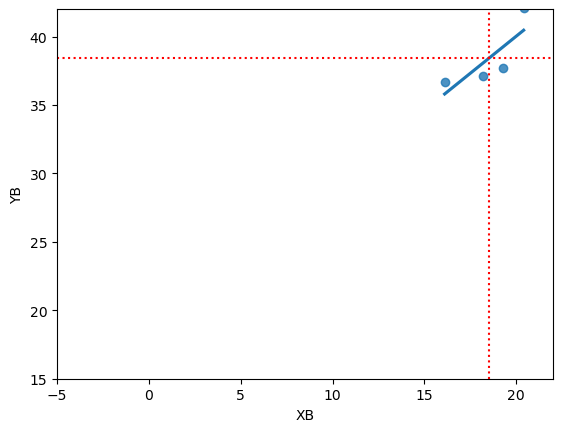

In [895]:
plotX=sns.regplot(x='XB',y='YB',data=X_df,ci=None)
plotX.set_xlim(-5,22)
plotX.set_ylim(15,42)
plotX.axvline(x=np.mean(XB),c="r",linestyle=":")
plotX.axhline(y=np.mean(YB),c="r",linestyle=":")

# OLS regression and matrix formulation

Use either the mean centered or the raw data to see the effect on the matrices

using the normal equations in matrix form:

$$
\hat{\boldsymbol{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{y}
$$

In [1002]:
X=[-2.4,-0.3,0.8,1.9]
Y=[-1.7,-1.3,-0.7,3.7]

In [988]:
#X=np.array([16.1,18.2,19.3,20.4])
#Y=np.array([36.7,37.1,37.7,42.1])

In [1003]:
# mean centered data or raw data
X=np.asarray(X)
X

array([-2.4, -0.3,  0.8,  1.9])

In [1004]:
Y=np.asarray(Y)
X.shape

(4,)

In [1005]:
Y

array([-1.7, -1.3, -0.7,  3.7])

In [1006]:
# add a column of 1's, this will allow for the intercept term as a constant term
X_bias=np.ones((4,1)) # m is the number of records in the dataset
X_bias

array([[1.],
       [1.],
       [1.],
       [1.]])

In [1007]:
X=np.reshape(X,(4,1))
Y=np.reshape(Y,(4,1))
X

array([[-2.4],
       [-0.3],
       [ 0.8],
       [ 1.9]])

In [1008]:
# This is the Design Matrix
newX=np.append(X_bias,X,axis=1)
newX

array([[ 1. , -2.4],
       [ 1. , -0.3],
       [ 1. ,  0.8],
       [ 1. ,  1.9]])

In [1016]:
X_transpose=np.transpose(newX)
X_transpose

array([[ 1. ,  1. ,  1. ,  1. ],
       [-2.4, -0.3,  0.8,  1.9]])

In [1017]:
X_transpose.shape

(2, 4)

In [1018]:
# Now we will multiply Xt and X
# This provides a SumX and a SSX, keeping track of the SS of your predictors
# when mean centered, you have a diagonal matrix
XtX=((X_transpose.dot(newX)))
XtX

array([[4.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.01000000e+01]])

$$
\begin{array}{|l|l|l|}
\hline \mathrm{X} \mathrm{t} \mathrm{X}= & \mathrm{n} & \Sigma x \\
\hline & \Sigma x & \Sigma x^2 \\
\hline
\end{array}
$$

In [1019]:
# SumX
np.sum(X)

2.220446049250313e-16

In [1020]:
# SSX
np.sum(np.square(X))

10.1

In [1021]:
XtX_Inverse=np.linalg.inv(XtX)
XtX_Inverse

array([[ 2.50000000e-01, -5.49615359e-18],
       [-5.49615359e-18,  9.90099010e-02]])

In [1022]:
XtY=((X_transpose.dot(Y)))
XtY

array([[ 0.  ],
       [10.94]])

$$
\begin{array}{|l|l|}
\hline \mathrm{Xt} \mathrm{Y}= & \Sigma y \\
\hline & \Sigma x \mathrm{y} \\
\hline
\end{array}
$$

In [1023]:
# This is the beta or coefficient matrix 
XtX_Inverse.dot(XtY)

array([[-6.01279202e-17],
       [ 1.08316832e+00]])

In [917]:
# check with statsmodel

# use either the mean centered data or the raw data to see the effect on the y-intercept

X=np.array([16.1,18.2,19.3,20.4])
Y=np.array([36.7,37.1,37.7,42.1])
X_dfA=pd.DataFrame(X,columns=["X"])
X_dfA["Y"]=Y.tolist()
X_dfA

,X,Y
0,16.1,36.7
1,18.2,37.1
2,19.3,37.7
3,20.4,42.1


In [1024]:
X=np.array([-2.4,-0.3,0.8,1.9])
Y=np.array([-1.7,-1.3,-0.7,3.7])
X_dfA=pd.DataFrame(X,columns=["X"])
X_dfA["Y"]=Y.tolist()
X_dfA

,X,Y
0,-2.4,-1.7
1,-0.3,-1.3
2,0.8,-0.7
3,1.9,3.7


In [1025]:
from statsmodels.formula.api import ols

model2=ols('Y~X',data=X_dfA)
results2=model2.fit()
print(results2.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.447  
Dependent Variable: Y                AIC:                17.5383
Date:               2024-07-28 16:59 BIC:                16.3109
No. Observations:   4                Log-Likelihood:     -6.7691
Df Model:           1                F-statistic:        3.430  
Df Residuals:       2                Prob (F-statistic): 0.205  
R-squared:          0.632            Scale:              3.4551 
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
------------------------------------------------------------------
Intercept   0.0000     0.9294   0.0000   1.0000   -3.9988   3.9988
X           1.0832     0.5849   1.8519   0.2052   -1.4334   3.5997
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          2.049
Prob(Omnibus):         nan      

C:\Users\carol\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [1026]:
from statsmodels.stats.anova import anova_lm
anova_results2 = anova_lm(results2)
print(anova_results2)

           df     sum_sq    mean_sq         F    PR(>F)
X         1.0  11.849861  11.849861  3.429703  0.205232
Residual  2.0   6.910139   3.455069       NaN       NaN


In [1038]:
# find the mean square error

# here are the predicted values
# if using raw data the y hat = 18.3614+1.0832*X

y_hat=1.0832*X
y_hat

array([-2.59968, -0.32496,  0.86656,  2.05808])

In [1039]:
# These predicted (or fitted) values can be found using the fittedvalues call of the results2 object
results2.fittedvalues

0   -2.599604
1   -0.324950
2    0.866535
3    2.058020
dtype: float64

In [1040]:
# find errors (or residuals)
errors= Y-y_hat
errors

array([ 0.89968, -0.97504, -1.56656,  1.64192])

In [1041]:
# These errors can be found using the resid call of the results2 object
results2.resid

0    0.899604
1   -0.975050
2   -1.566535
3    1.641980
dtype: float64

In [1042]:
# sum of the squares of the errors
np.sum(np.square(errors))

6.910138624000001

In [1043]:
# can call the sum of squares of the residuals to find SSRes (SSError)
results2.ssr

6.9101386138613865

In [1044]:
# MSE is the sum of the squares of the error divided by the dof
# dof = (n-k-1) = (sample size - number of predictors -1) 
#  = 4-1-1 = 2
(np.sum(np.square(errors))) / 2

3.4550693120000004

In [1045]:
results2.ssr/2

3.4550693069306933

In [1046]:
# square root of the MSE is the residual standard error
np.sqrt(results2.ssr/2)

1.8587816727444602

The standard error of the beta coefficient is equal to the square root (of the sum of squares of the predictor X * the MSE)

In [1047]:
np.sqrt((results2.ssr/2) / 10.1)

0.584881244350627

The standard error of the beta coefficient is equal to the square root (of the diagonal of the inverse of the XtX matrix * the square of the standard error of the regression (which is the mean squared error or the scale)).

In [1048]:
# standard error of beta: use the inverse of the XtX matrix
np.sqrt(3.4551*0.0990)

0.5848545973145804

In [1049]:
#since this is SLR and using mean centered data, we can be much easier and divide by the SSx 
np.sqrt(3.4551/10.10)

0.5848838422378336

In [1050]:
1/10.10

0.09900990099009901

Remember about the sError: The standard error of the regression (=standard error of the estimate =residual standard error) is the model estimate that is analogous to the standard deviation of a sample. It represents the average distance that the observed values fall from the regression line and is a measure of the precision of the model. 

* The standard error of the regression is equal to the square root of (the sum of the squares of the residual divided by the dof of the residuals) = square root of the MSE.  

To find the standard error of the beta coefficient, we find the sqrt(MSE divided by the sum of squares of the predictor x). 

* This is the same as the standard error of the regression ( = sqrt(SSE/(n-2)) ) divided by ( (the standard deviation of the x sample multiplied by the sqrt(n-1) ) or ( = sqrt(SSx/(n-1)) * sqrt(n-1) ) ) 

* The diagonal of the XtX matrix is the sum of squares of x, which we can divide by dof to get the sample variance of x. Square root of the sample variance is the sample std.

* This diagonal of the XtX matrix will provide the sum of squares for the x variables.  Since this is a simple linear regression example using mean centered data, we can divide by this value directly to find the SE(beta).  This is the same as multiplying by (1/SSx).

* In multiple linear regression, we will not be able to divide like this (you cant divide by a matrix) but you can multiple by the inverse of a matrix.  This is why we will look to matrix math to help in keeping track of the sum of squares for the x variables and have a matrix that holds the inverse of these.  

* The inverse of the XtX matrix provides a bookkeeping of the linear association of the predictors.  For MLR this is important.

* When the design matrix X is a real matrix, the elements of the inverse of (  XtX  ) provide a measure of the extent of linear dependence among the columns of  X. We will use this to explore MLR.